<a href="https://colab.research.google.com/github/abrown9008/STAT-7110-Quality-Control/blob/main/STAT_7110_Class_3_Python_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using the Shewhart $\bar{X}$ and $s$ and $s^2$ Charts

As we learned last week, we can use the Shewhart $\bar{X}$ and $R$ charts to monitor the mean and variance of a univariate continuous process.

However, research shows that using the sample range to estimate the process variation is inefficient and inaccurate. So despite its traditional usage, it is recommended to instead use the sample standard deviation, $s$, or the sample variance, $s^2$, as estimates of process variation instead.

Let's use the Pistons data to create a Phase I $\bar{X}$ and $s$ chart using `numpy` and `pandas`:

In [1]:
## Upload the Phase I Pistons Data ##
from google.colab import files
uploaded = files.upload()

Saving Piston Rings.xlsx to Piston Rings.xlsx


In [2]:
## Import Phase I Pistions Data
## using pandas ##

import pandas as pd
pistons = pd.read_excel('Piston Rings.xlsx')
pistons.head()

,Sample,Obs1,Obs2,Obs3,Obs4,Obs5
0,1,74.030,74.002,74.019,73.992,74.008
1,2,73.995,73.992,74.001,74.011,74.004
2,3,73.988,74.024,74.021,74.005,74.002
3,4,74.002,73.996,73.993,74.015,74.009
4,5,73.992,74.007,74.015,73.989,74.014


74.001176
0.009999450942273868
74.01459167122675
73.98776032877325
0.019634155177886303
-0.0008351874064114351


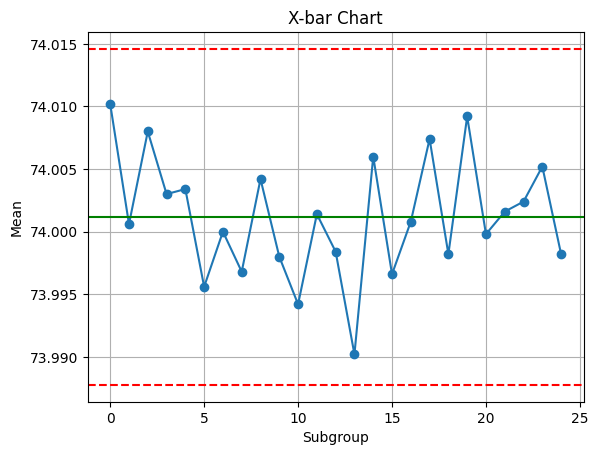

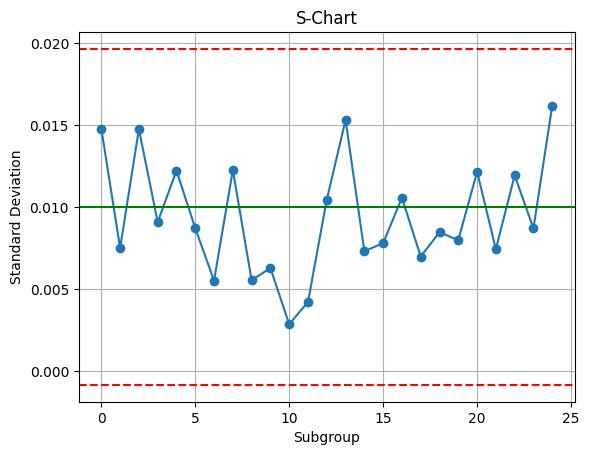

In [16]:
## Estimating Process Mean and Process Variation ##

import numpy as np

## Sample Means ##

piston1 = pistons.drop(columns=['Sample'])
means = piston1.mean(axis=1)
xdbar = means.mean()
print(xdbar)

## Sample Standard Deviations ##

n = 5
c4 = 0.94
stds = piston1.std(axis=1)
sigma_hat = stds.mean()/c4
print(sigma_hat)

## Calculate Control Limits for X-Bar ##

UCLx = xdbar + 3*sigma_hat/np.sqrt(n)
LCLx = xdbar - 3*sigma_hat/np.sqrt(n)
print(UCLx)
print(LCLx)

## Calculate Control Limits for S-Chart ##

UCLs = sigma_hat*c4 + 3*sigma_hat*np.sqrt(1-c4**2)
LCLs = sigma_hat*c4 - 3*sigma_hat*np.sqrt(1-c4**2)
print(UCLs)
print(LCLs)

## Plotting Phase I X-Bar and S-Charts ##

import matplotlib.pyplot as plt

plt.plot(means, marker='o', linestyle='-')
plt.axhline(UCLx, color='r', linestyle='--')
plt.axhline(xdbar, color='g', linestyle='-')
plt.axhline(LCLx, color='r', linestyle='--')
plt.title('X-bar Chart')
plt.xlabel('Subgroup')
plt.ylabel('Mean')
plt.grid(True)
plt.show()

plt.plot(stds,marker='o',linestyle='-')
plt.axhline(UCLs, color='r', linestyle='--')
plt.axhline(sigma_hat, color='g', linestyle='-')
plt.axhline(LCLs, color='r', linestyle='--')
plt.title('S-Chart')
plt.xlabel('Subgroup')
plt.ylabel('Standard Deviation')
plt.grid(True)
plt.show()

Okay great! Now that we can see that we have evidence for statistical control in both the $\bar{X}$ and $s$ charts, let's read in our Phase II Pistons data to perform Phase II analysis:

In [23]:
## Upload Phase II Pistons Data ##
uploaded = files.upload()

Saving Phase II rings data.xlsx to Phase II rings data (2).xlsx


In [24]:
## Import Phase II rings data.xlsx ##
pistons2 = pd.read_excel('Phase II rings data.xlsx')
pistons2.head()

,Sample,Obs1,Obs2,Obs3,Obs4,Obs5,...7,...8,...9,...10,...11
0,1,74.022,74.022,74.017,74.019,74.021,73.997,74.012,73.999,74.018,74.014
1,2,74.021,74.021,74.020,74.020,74.020,74.006,73.999,74.029,74.001,74.006
2,3,74.018,74.020,74.021,74.020,74.020,74.013,74.025,74.020,74.023,74.007
3,4,74.020,74.020,74.021,74.018,74.018,74.007,74.021,73.988,74.021,73.990
4,5,74.019,74.021,74.019,74.021,74.021,74.015,74.018,73.991,74.011,74.023
